#ICAIL Final Graduation Project_Random Password Maker(G8)

##(1) Importing Libraries

In [37]:
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML

##(2) Data Loading & Preparation :




In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeffersonvalandro/password-dataset")

print("Path to dataset files:", path)

100%|██████████| 113k/113k [00:00<00:00, 426kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jeffersonvalandro/password-dataset/versions/1


In [3]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/jeffersonvalandro/password-dataset/versions/1/passwords_dataset.csv')

In [4]:
data.head()

,Password,Has Lowercase,Has Uppercase,Has Special Character,Length,Strength
0,<%r?.,True,False,True,5,Weak
1,l(d_l,True,False,True,5,Weak
2,"|+Z)kDTRYo:q{""(",True,True,True,15,Strong
3,gwcNB[oS5!n%OPJ,True,True,True,15,Strong
4,^vXjCCP6,True,True,True,8,Strong


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Password               10000 non-null  object
 1   Has Lowercase          10000 non-null  bool  
 2   Has Uppercase          10000 non-null  bool  
 3   Has Special Character  10000 non-null  bool  
 4   Length                 10000 non-null  int64 
 5   Strength               10000 non-null  object
dtypes: bool(3), int64(1), object(2)
memory usage: 263.8+ KB


In [29]:
data.shape

(10000, 6)

In [32]:
data.describe()

,Length
count,10000.000000
mean,9.420600
std,4.015259
min,3.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,16.000000


In [5]:
# Check for missing values
data.isnull().sum()

,0
Password,0
Has Lowercase,0
Has Uppercase,0
Has Special Character,0
Length,0
Strength,0


In [33]:
data['Strength'].value_counts()

,count
Strength,
Strong,5952
Weak,2197
Medium,1851


In [6]:
# We encode to give categories (Weak, Medium, Strong) a numerical value (0, 1, 2) to use for modeling
label_encoder = LabelEncoder()
data['Strength'] = label_encoder.fit_transform(data['Strength'])

##(3) Model Training & Evaluation:

In [7]:
# I only care about these columns for the independent variables
X = data[['Has Lowercase', 'Has Uppercase', 'Has Special Character', 'Length']]

# Dependent variable
y = data['Strength']

In [8]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### Logistic Regression model:

In [9]:
# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Predictions for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [14]:
# Evaluate additional metrics for Logistic Regression
precision_log_reg, recall_log_reg, f1_log_reg, _ = precision_recall_fscore_support(y_test, y_pred_log_reg, average='weighted')

In [16]:
# Print the evaluation results
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1-score: {f1_log_reg:.4f}")

Logistic Regression Accuracy: 0.9970
Logistic Regression Precision: 0.9970
Logistic Regression Recall: 0.9970
Logistic Regression F1-score: 0.9970


In [18]:
# Cross-validation for Logistic Regression (accuracy)
log_reg_cv_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

In [20]:
# Print the cross-validation results
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_scores.mean():.4f} ± {log_reg_cv_scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9970 ± 0.0009


### Random Forest model:

In [10]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [13]:
# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [15]:
# Evaluate additional metrics for Random Forest
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

In [17]:
# Print the evaluation results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

Random Forest Accuracy: 1.0000
Random Forest Precision: 1.0000
Random Forest Recall: 1.0000
Random Forest F1-score: 1.0000


In [19]:
# Cross-validation for Random Forest (accuracy)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

In [21]:
# Print the cross-validation results
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.9996 ± 0.0002


## (4) Visualizations :

In [22]:
# Convert 'Strength' back to the original labels for visualization
data['Strength'] = label_encoder.inverse_transform(data['Strength'])

In [23]:
# Define the order of the categories
strength_order = ['Weak', 'Medium', 'Strong']

/tmp/ipython-input-3532989684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Strength', y='Length', data=data, palette='Set2', order=strength_order)


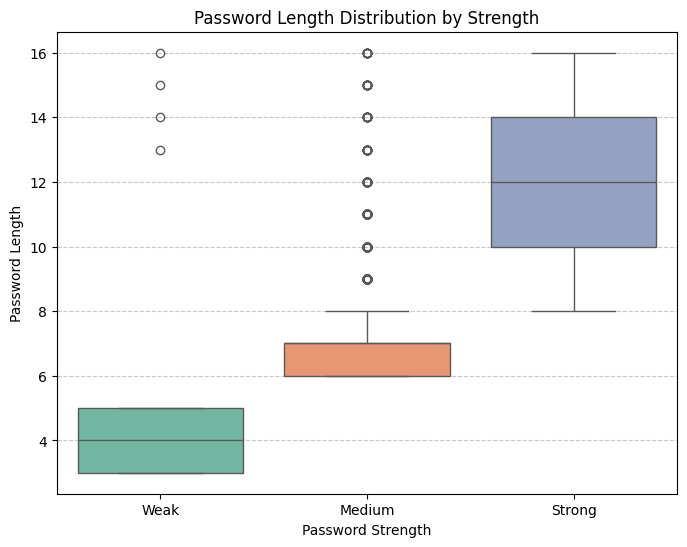

In [24]:
# Create the boxplot with ordered categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Strength', y='Length', data=data, palette='Set2', order=strength_order)
plt.title("Password Length Distribution by Strength")
plt.xlabel("Password Strength")
plt.ylabel("Password Length")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

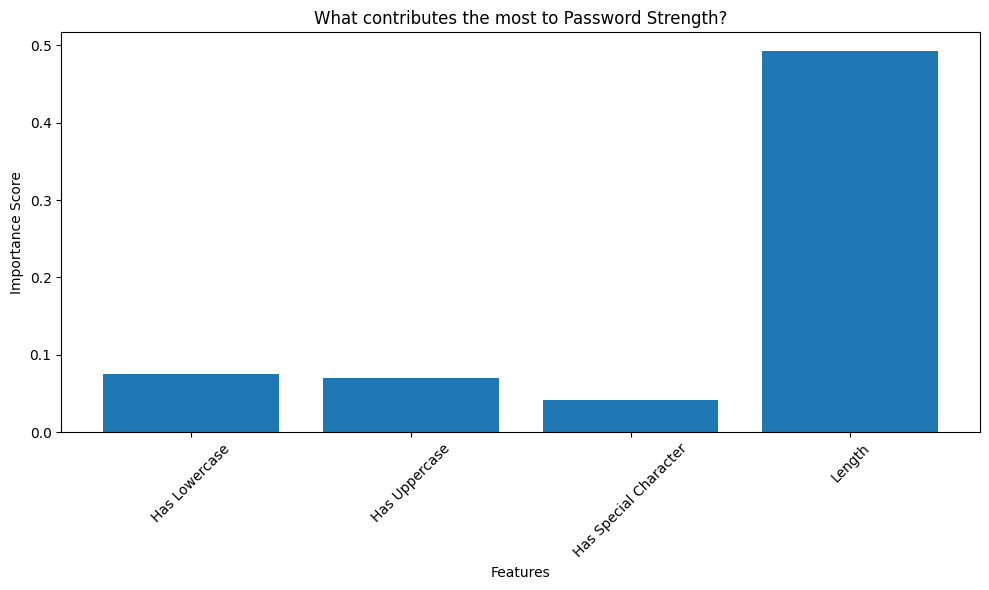

In [25]:
# A feature graph of what most contributes to a strong password
result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)
feature_names = X.columns
feature_importances = result.importances_mean
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.title('What contributes the most to Password Strength?')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (5) The Interactive Application :

#Random Password Generator

In [40]:
# 1. Password Strength Checker Class (The class remains almost the same)

class PasswordStrengthChecker:
    def __init__(self, models, label_encoder):
        self.models = models
        self.label_encoder = label_encoder
        self.style_map = {
            'Weak': {'color': 'red', 'emoji': '😞'},
            'Medium': {'color': 'orange', 'emoji': '😐'},
            'Strong': {'color': 'green', 'emoji': '💪'}
        }
        self.create_interface()

    def check_password_strength(self, password):
        features = {
            'Has Lowercase': int(any(c.islower() for c in password)),
            'Has Uppercase': int(any(c.isupper() for c in password)),
            'Has Special Character': int(any(not c.isalnum() for c in password)),
            'Length': len(password)
        }
        X = pd.DataFrame([features])
        predictions = {}
        for name, model in self.models.items():
            pred_num = model.predict(X)[0]
            pred_label = self.label_encoder.inverse_transform([pred_num])[0]
            predictions[name] = pred_label
        return predictions

    def create_interface(self):
        self.password_input = widgets.Password(description='Password:', placeholder='Enter password', layout=widgets.Layout(width='50%'))
        self.output = widgets.Output()
        self.password_input.observe(self.on_password_change, names='value')

    def on_password_change(self, change):
        with self.output:
            self.output.clear_output()
            password = change['new']
            if not password:
                return
            predictions = self.check_password_strength(password)
            display(HTML("<h4>Password Strength Predictions (توقعات قوة كلمة المرور):</h4>"))
            for model, strength in predictions.items():
                style = self.style_map.get(strength, {})
                color = style.get('color', 'black')
                emoji = style.get('emoji', '')
                display(HTML(f"<b>{model.replace('_', ' ').title()}:</b> <span style='color:{color}'>{strength} {emoji}</span>"))

# ---------------------------------------------------------------------------
# 2. Create an instance of the checker first
# ---------------------------------------------------------------------------
checker = PasswordStrengthChecker({'logistic_regression': log_reg_model, 'random_forest': rf_model}, label_encoder)

# ---------------------------------------------------------------------------
# 3. Widget-based Password Generator
# ---------------------------------------------------------------------------

# Input fields for the generator
style = {'description_width': 'initial'}
total_chars = widgets.IntText(value=12, description='Total Characters (العدد الإجمالي):', style=style)
num_letters = widgets.IntText(value=8, description='Number of Letters (عدد الحروف):', style=style)
num_numbers = widgets.IntText(value=2, description='Number of Numbers (عدد الأرقام):', style=style)
num_symbols = widgets.IntText(value=2, description='Number of Symbols (عدد الرموز):', style=style)

# Button to trigger generation
generate_button = widgets.Button(description="Generate & Check Password (أنشئ وافحص كلمة المرور)", button_style='success')
generator_output = widgets.Output() # To show messages and errors

# Function to handle button click
def on_generate_button_clicked(b):
    with generator_output:
        generator_output.clear_output()
        # Validation check
        if total_chars.value != num_letters.value + num_numbers.value + num_symbols.value:
            print("Error: The sum of parts must equal the total number of characters.")
            print("خطأ: مجموع الحروف والأرقام والرموز يجب أن يساوي العدد الإجمالي.")
            return

        # Password generation logic
        letters = random.choices(string.ascii_letters, k=num_letters.value)
        numbers = random.choices(string.digits, k=num_numbers.value)
        symbols = random.choices(string.punctuation, k=num_symbols.value)

        password_list = letters + numbers + symbols
        random.shuffle(password_list)
        generated_password = ''.join(password_list)

        # --- THIS IS THE KEY STEP FOR AUTOMATION ---

        checker.password_input.value = generated_password

        display(HTML(f"<b>New Password Generated (كلمة مرور جديدة):</b> {generated_password}"))


generate_button.on_click(on_generate_button_clicked)

# ---------------------------------------------------------------------------
# 4. Display all widgets together in a structured layout
# ---------------------------------------------------------------------------

# Layout for the generator inputs
generator_inputs = widgets.VBox([
    widgets.HTML("<h3>Password Generator (مولد كلمات المرور)</h3>"),
    total_chars,
    num_letters,
    num_numbers,
    num_symbols,
    generate_button,
    generator_output
])

# Layout for the checker
checker_ui = widgets.VBox([
    widgets.HTML("<hr><h3>Password Strength Checker (فاحص قوة كلمة المرور)</h3>"),
    checker.password_input,
    checker.output
])

# Display everything
display(generator_inputs, checker_ui)